In [39]:
import numpy as np
import qiskit
from qiskit import transpile, assemble
from qiskit.visualization import *
from qiskit  import Aer, QuantumCircuit

from qiskit.utils import QuantumInstance
from qiskit.opflow import AerPauliExpectation
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap


import matplotlib.pyplot as plt
import os
import pandas as pd


from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import MinMaxScaler


In [110]:
#load the actual hackthon data (fashion-mnist)
images=np.load('C:/Users/jpiyu/OneDrive/Desktop/images.npy')
labels=np.load('C:/Users/jpiyu/OneDrive/Desktop/labels.npy')
#you can visualize it
#plt.imshow(images[110])

In [111]:
images = images/255
def flatten_images(images: list) -> list:
    flattened_images = []
    for image in images:
        flattened_images.append(image.flatten())
    return np.array(flattened_images)
flat_images = flatten_images(images)

tsvd = TruncatedSVD(9)
redimg = tsvd.fit_transform(flat_images)

redimg[10]

array([ 1.79460001e-04, -3.99999202e-05,  3.68921832e-05, -4.90955529e-06,
       -1.70603273e-05, -1.31404438e-05, -2.21396422e-05,  1.40030591e-05,
        3.76355611e-05])

In [2]:
def flatten_images(images: list) -> list:
        flattened_images = []
        for image1 in images:
            flattened_images.append(image1.flatten())
        return np.array(flattened_images)
    flat_images = flatten_images(image)
    pca = PCA(n_components=9) 
    reduced_images = pca.fit_transform(flat_images[10].reshape(28,28))
    print(reduced_images) 

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 6)

In [94]:
decomposedImages.shape

(28, 9)

In [86]:
flatOutputImages.shape

(784,)

In [81]:
redimg.shape

(2000, 9)

In [82]:
print(redimg[100])

[ 2.68602721e-07 -3.45616669e-08  9.44520764e-08 -4.31916927e-08
  2.73942380e-08  2.05215201e-08  2.97579978e-08 -4.71041744e-08
  3.25415259e-09]


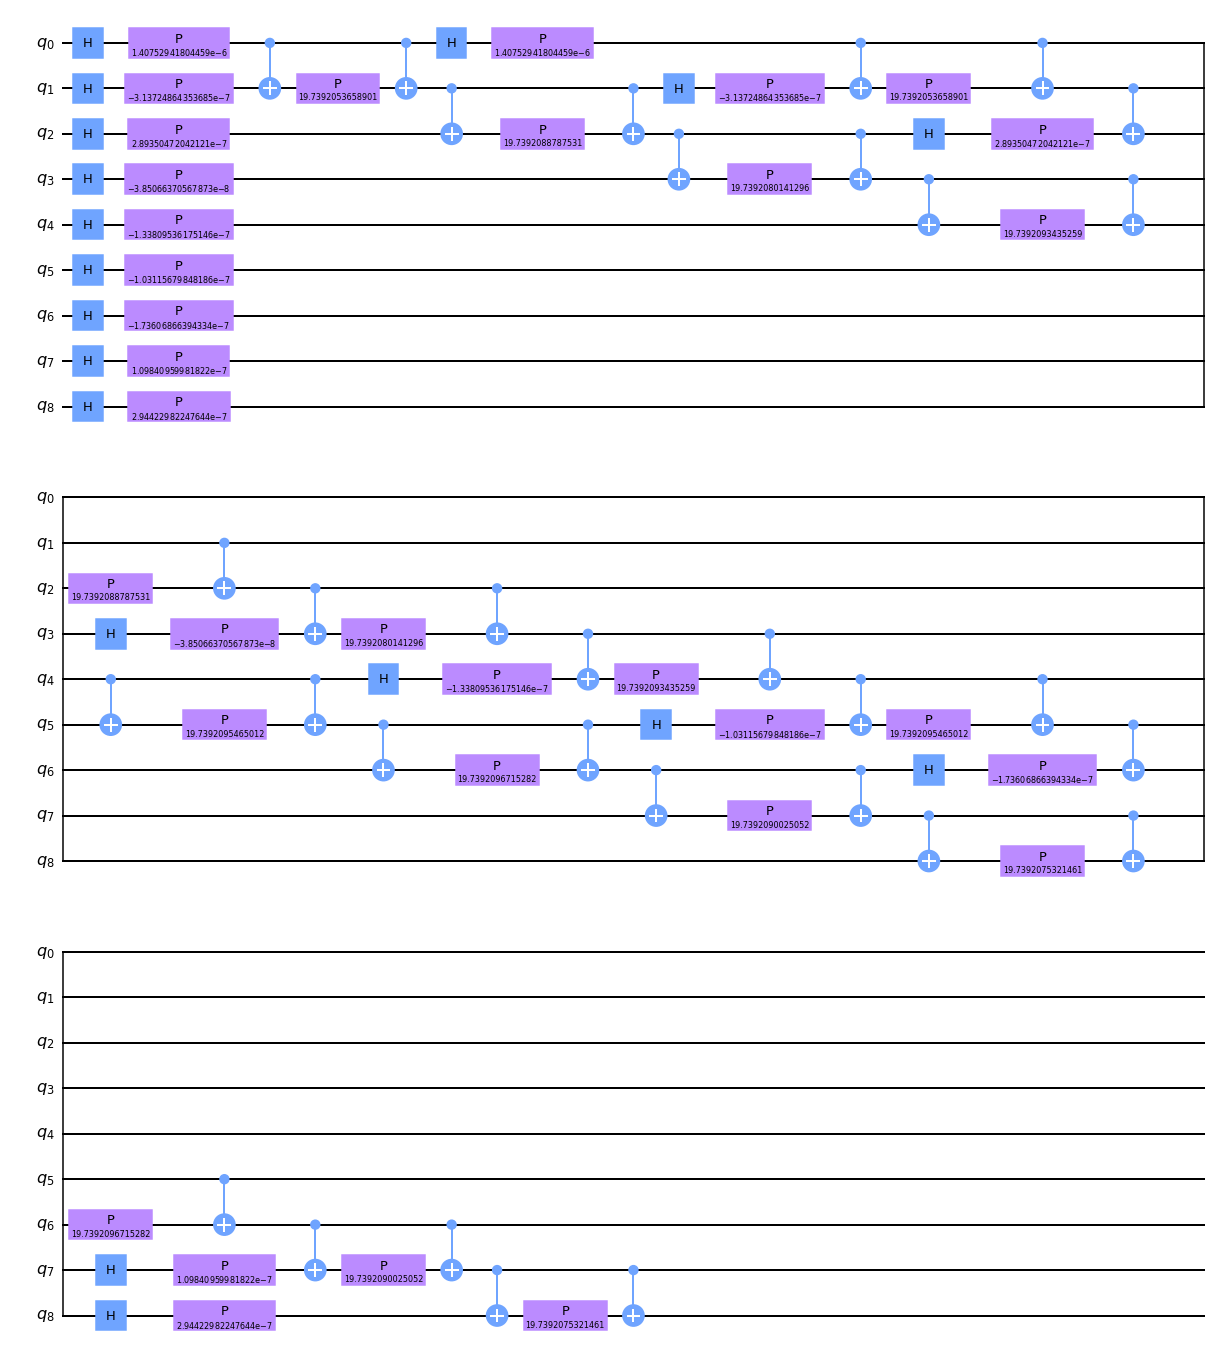

In [83]:
def feature_encoding():
        # build your code here
    qc = ZZFeatureMap(feature_dimension=len(redimg[10]), entanglement='linear')
    return qc

qc = feature_encoding()

encode = qc.bind_parameters(redimg[10])
encode.decompose().draw("mpl")

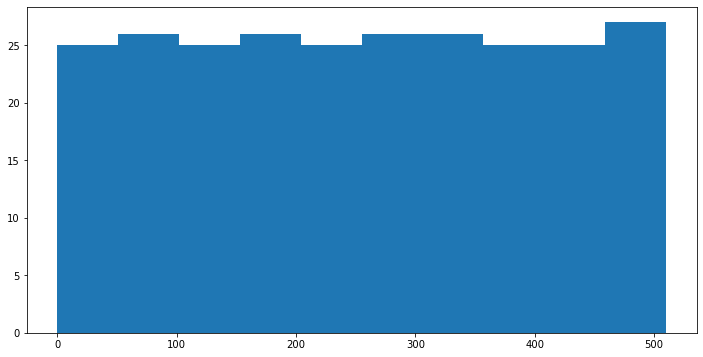

In [84]:
from qiskit import BasicAer
from qiskit.execute_function import execute
def simulate(circuit: qiskit.QuantumCircuit) -> dict:
    """Simulate the circuit, give the state vector as the result."""
    backend = BasicAer.get_backend('statevector_simulator')
    job = execute(circuit, backend)
    result = job.result()
    state_vector = result.get_statevector()
    counts = result.get_counts(circuit)
    
    histogram = dict()
    for i in range(len(state_vector)):
        population = abs(state_vector[i]) ** 2
        if population > 1e-9:
            histogram[i] = population
    
    return counts, plt.hist(histogram)

counts, histogram = simulate(encode)

In [75]:
def unison_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]

redimg, labels = unison_shuffled_copies(redimg, labels)

In [76]:
encode = ZZFeatureMap(feature_dimension=len(redimg[500]), entanglement='linear')

# construct ansatz
num_inputs = len(redimg[10])
ansatz = RealAmplitudes(len(redimg[10]), reps=1)

params = encode.parameters

# construct quantum circuit
QC = QuantumCircuit(num_inputs)
QC.append(encode, range(num_inputs))
QC.append(ansatz, range(num_inputs))
#QC.decompose().draw(output="mpl")

In [52]:
from qiskit_machine_learning.neural_networks import EstimatorQNN

from qiskit.utils import algorithm_globals
algorithm_globals.random_seed = 42

estimator_qnn = EstimatorQNN(
    circuit=QC, input_params=params, weight_params=ansatz.parameters
)

In [53]:

redimg[2]

array([ 2.23913344e-04, -4.59903404e-05,  4.18669250e-05, -1.60769165e-05,
        9.71935584e-06, -1.68119640e-05, -2.45242846e-05,  2.24248065e-07,
        3.53266638e-06])

In [35]:
estimator_qnn.forward(redimg[450:550], algorithm_globals.random.random(estimator_qnn.num_weights))

array([[0.25416987],
       [0.25394622],
       [0.25395522],
       [0.25406324],
       [0.25394183],
       [0.2539959 ],
       [0.25396726],
       [0.25402354],
       [0.25414615],
       [0.25412299],
       [0.25400991],
       [0.25405022],
       [0.25401942],
       [0.25393206],
       [0.25405053],
       [0.25402051],
       [0.25397616],
       [0.25397904],
       [0.25412091],
       [0.25394676],
       [0.25417645],
       [0.25401859],
       [0.25404489],
       [0.25417764],
       [0.25409583],
       [0.25412995],
       [0.25391411],
       [0.25412269],
       [0.2541412 ],
       [0.25391632],
       [0.25415329],
       [0.25404885],
       [0.25398977],
       [0.25400291],
       [0.25403682],
       [0.25403968],
       [0.25403967],
       [0.25415852],
       [0.25398561],
       [0.25408137],
       [0.25409425],
       [0.25397726],
       [0.25405718],
       [0.25398835],
       [0.25408542],
       [0.25397736],
       [0.25393005],
       [0.254

In [36]:
# callback function that draws a live plot when the .fit() method is called
from IPython.display import clear_output

def callback_graph(weights, obj_func_eval):
    clear_output(wait=True)
    objective_func_vals.append(obj_func_eval)
    plt.title("Objective function value against iteration")
    plt.xlabel("Iteration")
    plt.ylabel("Objective function value")
    plt.plot(range(len(objective_func_vals)), objective_func_vals)
    plt.show()

In [37]:
# construct neural network classifier
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier
from qiskit.algorithms.optimizers import COBYLA
estimator_classifier = NeuralNetworkClassifier(
    estimator_qnn, optimizer=COBYLA(maxiter=60), callback=callback_graph
)

In [ ]:
print(labels)
from collections import Counter

print(Counter(labels[0:100]).keys()) # equals to list(set(words))
print(Counter(labels[0:100]).values() )# counts the elements' frequency

[ True  True  True ... False False False]
dict_keys([True])
dict_values([100])


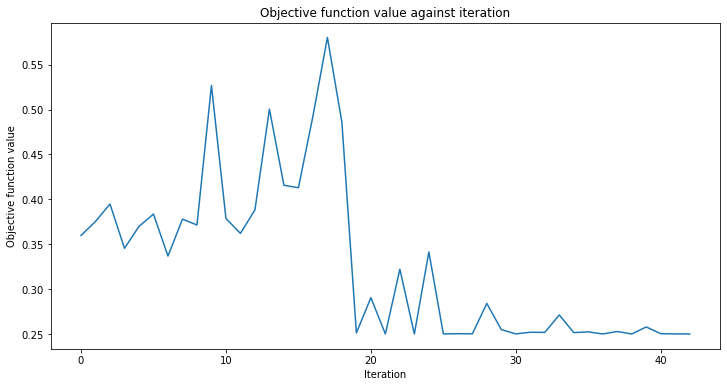

KeyboardInterrupt: 

In [38]:
# create empty array for callback to store evaluations of the objective function
objective_func_vals = []
plt.rcParams["figure.figsize"] = (12, 6)

# fit classifier to data
estimator_classifier.fit(redimg[450:550], labels[450:550])

# return to default figsize
plt.rcParams["figure.figsize"] = (6, 4)

# score classifier
estimator_classifier.score(redimg[450:550], labels[450:550])

In [ ]:
counts

{'0000': 0.571510192458421,
 '0001': 1.0343698e-06,
 '0010': 4.508676229e-06,
 '0011': 0.120319773479361,
 '0100': 1.1923090108e-05,
 '0101': 0.024823299272918,
 '0110': 0.117901605678011,
 '0111': 4.057110475e-06,
 '1000': 1.4183742843e-05,
 '1001': 0.004920562970143,
 '1010': 0.023370877320202,
 '1011': 3.2926774e-06,
 '1100': 0.113259347599581,
 '1101': 1.910356626e-06,
 '1110': 8.993682378e-06,
 '1111': 0.023844437515503}

Pixel 00 has intensity ~= 0.06348100517324178
Pixel 01 has intensity ~= 0.004351069340894461
Pixel 10 has intensity ~= 0.020665945650411514
Pixel 11 has intensity ~= 0.013364897414476955


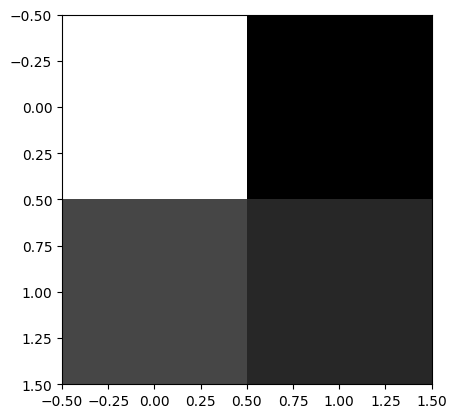

In [ ]:
image = []
for pixel in range(4):
    # convert to pixel number to bit strings, i.e. (00, 01 etc.)
    bit_str = f"{pixel:02b}"

    # Count no. of times we measure pixel string with intensity
    # bit == 1, and intensity bit == 0 respectively (if the string
    # doesn't exist in the dict, we default to 0).
    n_11 = counts.get('11'+bit_str, 0)
    n_10 = counts.get('10'+bit_str, 0) 
    n_01 = counts.get('01'+bit_str, 0)
    n_00 = counts.get('00'+bit_str, 0)
    n_zeros = counts.get('00'+bit_str, 0)

    # then pixel intensity ~= fraction of 1s
    pixel_value = (n_11*255 + n_10 * 150 + n_01 * 50 ) / (255+150+50)
    image.append(pixel_value)
    print(f"Pixel {bit_str} has intensity ~= {pixel_value}")
image = np.array(image)
image = np.reshape(image, (2,2))
plt.imshow(image, cmap = "gray")

In [ ]:
image = image.flatten()
print(image)
image, remainder = signal.deconvolve(image, kernel1.flatten())

[0.06348101 0.00435107 0.02066595 0.0133649 ]


In [ ]:
print(image)

[]


In [ ]:
plt.imshow(np.reshape(image, (28,28)))

ValueError: cannot reshape array of size 0 into shape (28,28)